In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler


In [51]:
df = pd.read_csv('/Users/devrajdutta/Documents/FORE college folder/Term 3/MLP/Datasets/diabetes_data_upload.csv')

In [52]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [53]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [54]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [55]:
#Splitting the Dataset
X = df.drop('class',axis='columns')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

In [27]:
f_name = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']

In [56]:
X_train.shape

(442, 16)

In [57]:
X_test.shape

(78, 16)

In [58]:
ct = DecisionTreeClassifier(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [59]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_te = ct.predict(X_test)

In [61]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size #0.96

0.9615384615384616

[Text(473.5657894736842, 361.49399999999997, 'X[3] <= 0.5\nentropy = 0.961\nsamples = 442\nvalue = [170, 272]'),
 Text(330.39473684210526, 323.442, 'X[2] <= 0.5\nentropy = 0.901\nsamples = 240\nvalue = [164, 76]'),
 Text(202.6421052631579, 285.39, 'X[1] <= 0.5\nentropy = 0.711\nsamples = 190\nvalue = [153, 37]'),
 Text(105.72631578947369, 247.338, 'X[14] <= 0.5\nentropy = 0.981\nsamples = 43\nvalue = [18, 25]'),
 Text(70.48421052631579, 209.28599999999997, 'X[0] <= 13.0\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]'),
 Text(52.863157894736844, 171.23399999999998, 'X[8] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(35.242105263157896, 133.182, 'X[0] <= 10.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(17.621052631578948, 95.13, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(52.863157894736844, 95.13, 'X[0] <= 11.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(35.242105263157896, 57.077999999999975, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'

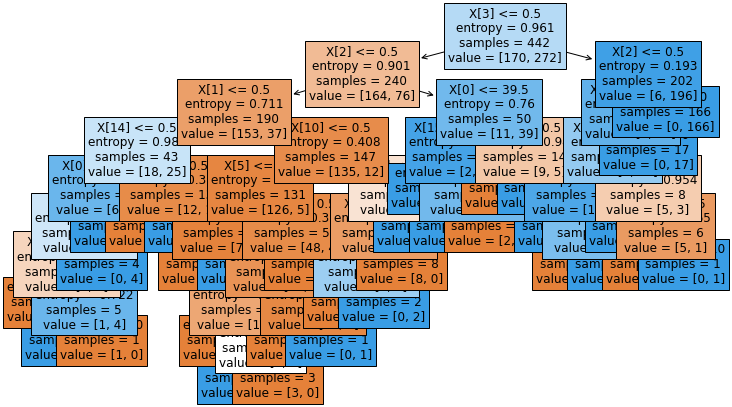

In [76]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [78]:
from sklearn.metrics import precision_score
precision_score(y_test, y_te, average=None)

array([0.90909091, 1.        ])

In [79]:
from sklearn.metrics import recall_score
recall_score(y_test, y_te, average=None)

array([1.    , 0.9375])

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_te, average=None)

array([0.95238095, 0.96774194])

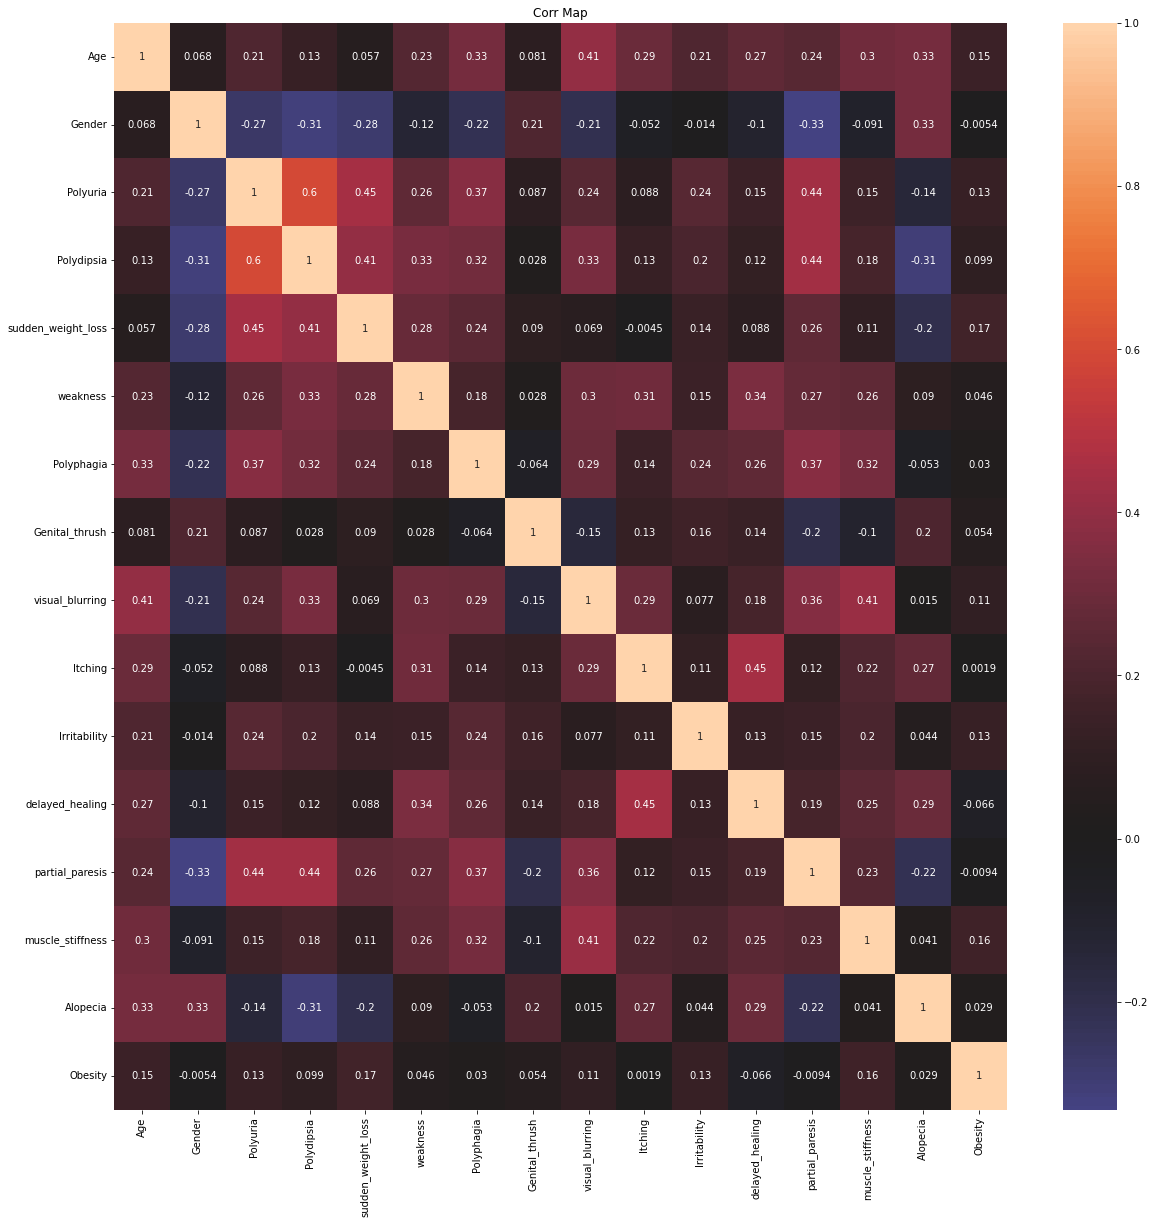

In [82]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), center=0, annot=True)
plt.title("Corr Map")
plt.show()

# KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
y_test.head(5)

130    1
283    0
276    0
365    1
74     1
Name: class, dtype: int64

In [86]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [87]:
y_pred = knn.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[29,  1],
       [ 3, 45]])

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, y_pred)

0.9487179487179487

In [91]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.90625   , 0.97826087]),
 array([0.96666667, 0.9375    ]),
 array([0.93548387, 0.95744681]),
 array([30, 48]))

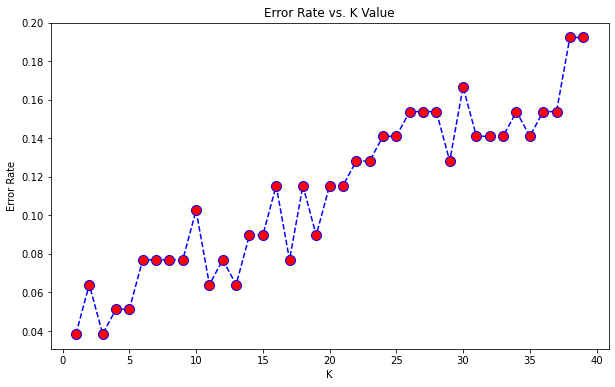

Minimum error:- 0.038461538461538436 at K = 1


In [92]:
from matplotlib import pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [94]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#as K=1
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [95]:
y_pred = knn.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.9615384615384616